In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.utils import to_categorical
import albumentations as A

# Define dataset path and image size
dataset_path = "data"  # Path to your dataset
image_size = (64, 64)  # Resize to 64x48 for SVM

print('Our dataset = ')
print(os.listdir(dataset_path))

Our dataset = 
['Grupo_0', 'Grupo_1', 'Grupo_2', 'Grupo_3', 'Grupo_4', 'Grupo_5']


All Images

In [2]:
def load_images_from_folder(folder_path, max_depth = 5):
    images = []
    labels = []
    names = []
    corruptedFiles = []
    image_extensions = ["bmp"]

    for root, dirs, files in os.walk(folder_path):
        current_depth = root[len(folder_path):].count(os.sep)

        if ('LG' in root):
            current_depth -= 1
        

        if current_depth <= max_depth:
            for file in files:
                if any(file.lower().endswith(ext) for ext in image_extensions):
                    img_path = os.path.join(root, file)
                    try:
                        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                        if img is not None:
                            img = cv2.resize(img, image_size)
                            images.append(img)
                            labels.append(file[6]!='0')
                            names.append(file)
                    except:
                        corruptedFiles.append(img_path)

        else:
            del dirs[:]
    
    print(f"Following {len(corruptedFiles)} files are corrupt or encountered error: \n {corruptedFiles}")

    return np.array(images), np.array(labels), np.array(names)

images, labels, names = load_images_from_folder(dataset_path)
print(f"Read {len(images)} images from the data folder with shape {images.shape}")

Following 0 files are corrupt or encountered error: 
 []
Read 25201 images from the data folder with shape (25201, 64, 64)


In [3]:
# Reshape images to 1D vectors for SVM input (Flatten each 2D image into a vector)
images = images.reshape(images.shape[0], -1)

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.4, random_state=42)

In [4]:
# Initialize SVM classifier
svm = SVC(kernel='rbf', gamma='scale', C=1)

# Train the SVM model
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Print accuracy and classification report
print("Accuracy on Test Set: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on Test Set:  0.9482194226763218
Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.75      0.85      2036
        True       0.94      1.00      0.97      8045

    accuracy                           0.95     10081
   macro avg       0.97      0.87      0.91     10081
weighted avg       0.95      0.95      0.95     10081



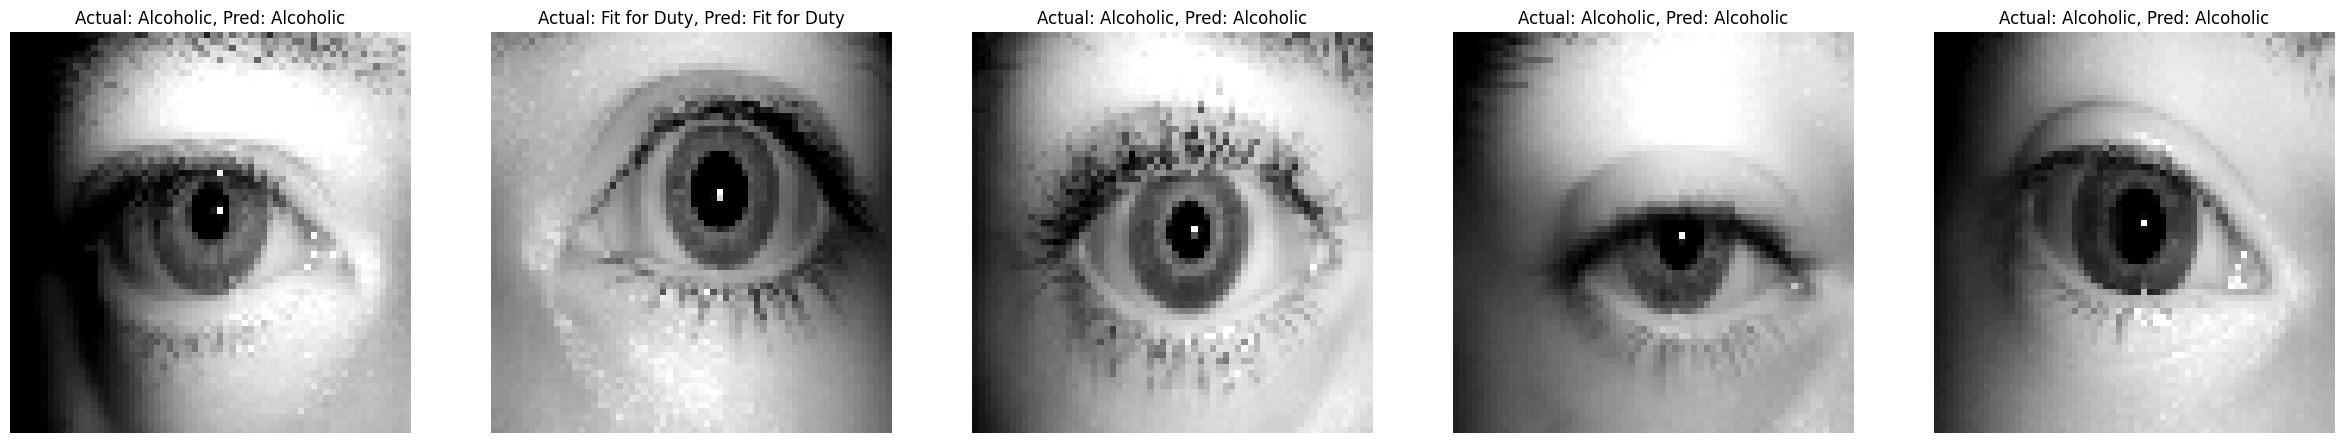

In [5]:
# Optionally, you can visualize some of the images and their predictions
def plot_images(images, labels, preds, num_images=5):
    plt.figure(figsize=(30, 30))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i], cmap='gray')
        if labels[i]:
            label='Alcoholic'
        else:
            label='Fit for Duty'
        if preds[i]:
            pred='Alcoholic'
        else:
            pred='Fit for Duty'
        plt.title(f"Actual: {label}, Pred: {pred}")
        plt.axis('off')
    plt.show()

# Visualize some test images with their predictions
plot_images(X_test.reshape(X_test.shape[0], *image_size), y_test, y_pred)